In [8]:
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
from pymorphy2 import MorphAnalyzer
from gensim.models import Word2Vec
from sympy import * 
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import numpy as np
import string
import re
from scipy import stats


rd.seed(14)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\White\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\White\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
data = pd.read_csv('data/news/news.csv')
data.info()
data['source'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21673 entries, 0 to 21672
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source            21673 non-null  object
 1   title             21670 non-null  object
 2   text              21673 non-null  object
 3   publication_date  21673 non-null  object
 4   rubric            4503 non-null   object
 5   subrubric         4473 non-null   object
 6   tags              14752 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


array(['lenta.ru', 'meduza.io', 'ria.ru', 'tjournal.ru'], dtype=object)

In [10]:
data.head()

,source,title,text,publication_date,rubric,subrubric,tags
0,lenta.ru,Синий богатырь,В 1930-е годы Советский Союз охватила лихорадк...,2020-08-30T00:01:00+03:00,Экономика,Госэкономика,NaN
1,lenta.ru,Загитова согласилась вести «Ледниковый период»,Олимпийская чемпионка по фигурному катанию Ал...,2020-08-31T20:04:00+03:00,Спорт,Зимние виды,NaN
2,lenta.ru,Объяснена опасность однообразного питания,Российский врач-диетолог Римма Мойсенко объясн...,2020-08-31T20:07:00+03:00,Из жизни,Еда,NaN
3,lenta.ru,«Предохраняться? А зачем?»,В 2019 году телеканал «Ю» запустил адаптацию з...,2020-08-30T00:04:00+03:00,Интернет и СМИ,ТВ и радио,NaN
4,lenta.ru,Ефремов систематически употреблял наркотики,Актер Михаил Ефремов систематически употребл...,2020-08-31T18:27:00+03:00,Культура,Кино,NaN


In [11]:
data = data[data['source'] != 'tjournal.ru']
data['source'].unique()

array(['lenta.ru', 'meduza.io', 'ria.ru'], dtype=object)

In [12]:
data = data.loc[ (data['text'].str.len() > 6200) ]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 0 to 20796
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   source            622 non-null    object
 1   title             622 non-null    object
 2   text              622 non-null    object
 3   publication_date  622 non-null    object
 4   rubric            32 non-null     object
 5   subrubric         32 non-null     object
 6   tags              414 non-null    object
dtypes: object(7)
memory usage: 38.9+ KB


In [13]:
random_seed = rd.randint(0, data.shape[0])
print(random_seed)

109


In [14]:
news_text = data.iloc[random_seed, 2]
print(news_text)

Эпоха самоизоляции только началась, а люди уже не находят себе места. Они обрастают волосами и ногтями, отказываются от еды, путаются в собственном имени-отчестве, забывают спать, их не волнует даже телевизор. Короче, они дичают. Это не пустые слова: в данный момент я, Алексей Яблоков, говорю не об абстрактном чиновнике или водителе троллейбуса, а о себе — о жителе Земли, представителе своего биологического вида, который, сидя взаперти, стремительно теряет человеческий облик. Так кто мне поможет его сохранить? Недавно директор Школы антропологии будущего при РАНХиГС Александр Асмолов и его коллеги опубликовали  аналитический обзор , предназначенный ни много ни мало для правительства Российской Федерации и администрации президента — как может повлиять пандемия COVID-19 на человечество? Ученые предупреждают: возможно, нам светит переосмысление религии, изменение привычных социокультурных практик, разделение общества на «своих» и «чужих» и другие глубокие трансформации. Однако в этом доку

In [15]:
len(news_text)

10821

In [16]:
news_text = news_text.lower()

In [17]:
print(news_text)

эпоха самоизоляции только началась, а люди уже не находят себе места. они обрастают волосами и ногтями, отказываются от еды, путаются в собственном имени-отчестве, забывают спать, их не волнует даже телевизор. короче, они дичают. это не пустые слова: в данный момент я, алексей яблоков, говорю не об абстрактном чиновнике или водителе троллейбуса, а о себе — о жителе земли, представителе своего биологического вида, который, сидя взаперти, стремительно теряет человеческий облик. так кто мне поможет его сохранить? недавно директор школы антропологии будущего при ранхигс александр асмолов и его коллеги опубликовали  аналитический обзор , предназначенный ни много ни мало для правительства российской федерации и администрации президента — как может повлиять пандемия covid-19 на человечество? ученые предупреждают: возможно, нам светит переосмысление религии, изменение привычных социокультурных практик, разделение общества на «своих» и «чужих» и другие глубокие трансформации. однако в этом доку

In [18]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [19]:
news_text = remove_chars_from_text(news_text, string.digits)
print(news_text)

эпоха самоизоляции только началась, а люди уже не находят себе места. они обрастают волосами и ногтями, отказываются от еды, путаются в собственном имени-отчестве, забывают спать, их не волнует даже телевизор. короче, они дичают. это не пустые слова: в данный момент я, алексей яблоков, говорю не об абстрактном чиновнике или водителе троллейбуса, а о себе — о жителе земли, представителе своего биологического вида, который, сидя взаперти, стремительно теряет человеческий облик. так кто мне поможет его сохранить? недавно директор школы антропологии будущего при ранхигс александр асмолов и его коллеги опубликовали  аналитический обзор , предназначенный ни много ни мало для правительства российской федерации и администрации президента — как может повлиять пандемия covid- на человечество? ученые предупреждают: возможно, нам светит переосмысление религии, изменение привычных социокультурных практик, разделение общества на «своих» и «чужих» и другие глубокие трансформации. однако в этом докуме

In [20]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [21]:
spec_chars = string.punctuation + '–\n\xa0«»\t—…' 

In [22]:
news_text = remove_chars_from_text(news_text, spec_chars)
print(news_text)

эпоха самоизоляции только началась алюди уже ненаходят себе места они обрастают волосами иногтями отказываются отеды путаются всобственном имениотчестве забывают спать ихневолнует даже телевизор короче они дичают это непустые слова вданный момент я алексей яблоков говорю необабстрактном чиновнике или водителе троллейбуса аосебе ожителе земли представителе своего биологического вида который сидя взаперти стремительно теряет человеческий облик так кто мне поможет его сохранить недавно директор школы антропологии будущего при ранхигс александр асмолов иего коллеги опубликовали  аналитический обзор предназначенный нимного нимало для правительства российской федерации иадминистрации президента как может повлиять пандемия covid начеловечество ученые предупреждают возможно нам светит переосмысление религии изменение привычных социокультурных практик разделение общества насвоих ичужих идругие глубокие трансформации однако вэтом документе нет очевидных антропологических истин которые моглибы пр

In [23]:
news_text = " ".join(news_text.split())
print(news_text)

эпоха самоизоляции только началась алюди уже ненаходят себе места они обрастают волосами иногтями отказываются отеды путаются всобственном имениотчестве забывают спать ихневолнует даже телевизор короче они дичают это непустые слова вданный момент я алексей яблоков говорю необабстрактном чиновнике или водителе троллейбуса аосебе ожителе земли представителе своего биологического вида который сидя взаперти стремительно теряет человеческий облик так кто мне поможет его сохранить недавно директор школы антропологии будущего при ранхигс александр асмолов иего коллеги опубликовали аналитический обзор предназначенный нимного нимало для правительства российской федерации иадминистрации президента как может повлиять пандемия covid начеловечество ученые предупреждают возможно нам светит переосмысление религии изменение привычных социокультурных практик разделение общества насвоих ичужих идругие глубокие трансформации однако вэтом документе нет очевидных антропологических истин которые моглибы при

In [24]:
len(news_text)

10056

In [25]:
text_tokens = nltk.word_tokenize(news_text)

In [26]:
print(type(text_tokens), len(text_tokens))
text_tokens[:10]

<class 'list'> 1236


['эпоха',
 'самоизоляции',
 'только',
 'началась',
 'алюди',
 'уже',
 'ненаходят',
 'себе',
 'места',
 'они']

In [27]:
russian_stopwords = nltk.corpus.stopwords.words("russian")
russian_stopwords.extend(['это', 'который'])
print(russian_stopwords[:10])

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']


In [28]:
text_tokens = [token for token in text_tokens if token not in russian_stopwords]

In [29]:
print(text_tokens)

['эпоха', 'самоизоляции', 'началась', 'алюди', 'ненаходят', 'места', 'обрастают', 'волосами', 'иногтями', 'отказываются', 'отеды', 'путаются', 'всобственном', 'имениотчестве', 'забывают', 'спать', 'ихневолнует', 'телевизор', 'короче', 'дичают', 'непустые', 'слова', 'вданный', 'момент', 'алексей', 'яблоков', 'говорю', 'необабстрактном', 'чиновнике', 'водителе', 'троллейбуса', 'аосебе', 'ожителе', 'земли', 'представителе', 'своего', 'биологического', 'вида', 'сидя', 'взаперти', 'стремительно', 'теряет', 'человеческий', 'облик', 'поможет', 'сохранить', 'недавно', 'директор', 'школы', 'антропологии', 'будущего', 'ранхигс', 'александр', 'асмолов', 'иего', 'коллеги', 'опубликовали', 'аналитический', 'обзор', 'предназначенный', 'нимного', 'нимало', 'правительства', 'российской', 'федерации', 'иадминистрации', 'президента', 'повлиять', 'пандемия', 'covid', 'начеловечество', 'ученые', 'предупреждают', 'возможно', 'нам', 'светит', 'переосмысление', 'религии', 'изменение', 'привычных', 'социокуль

In [30]:
print(len(text_tokens))

1005


In [31]:
text = nltk.Text(text_tokens)

In [32]:
fd_tokens = nltk.probability.FreqDist(text)
fd_tokens.most_common(10)

[('ножницы', 5),
 ('например', 4),
 ('вообще', 4),
 ('понравилось', 4),
 ('волосы', 4),
 ('сидя', 3),
 ('постричься', 3),
 ('визоляции', 3),
 ('карантина', 3),
 ('условиях', 3)]

In [33]:
morph = MorphAnalyzer()

In [34]:
normalized_tokens = [morph.normal_forms(token)[0] for token in text_tokens if len(token) > 2]
normalized_tokens

['эпоха',
 'самоизоляция',
 'начаться',
 'ачеловек',
 'ненаходить',
 'место',
 'обрастать',
 'волос',
 'иноготь',
 'отказываться',
 'отед',
 'путаться',
 'всобственный',
 'имениотчество',
 'забывать',
 'спать',
 'ихневолновать',
 'телевизор',
 'короче',
 'дичать',
 'непустой',
 'слово',
 'вдать',
 'момент',
 'алексей',
 'яблоков',
 'говорить',
 'необабстрактный',
 'чиновник',
 'водитель',
 'троллейбус',
 'аосеб',
 'ожитель',
 'земля',
 'представитель',
 'свой',
 'биологический',
 'вид',
 'сидя',
 'взаперти',
 'стремительно',
 'терять',
 'человеческий',
 'облик',
 'помочь',
 'сохранить',
 'недавно',
 'директор',
 'школа',
 'антропология',
 'будущее',
 'ранхигс',
 'александр',
 'асмолов',
 'иего',
 'коллега',
 'опубликовать',
 'аналитический',
 'обзор',
 'предназначить',
 'нимного',
 'нимало',
 'правительство',
 'российский',
 'федерация',
 'иадминистрация',
 'президент',
 'повлиять',
 'пандемия',
 'covid',
 'начеловечество',
 'учёный',
 'предупреждать',
 'возможно',
 'мы',
 'светить',
 

In [35]:
normolized_text = nltk.Text(normalized_tokens)
fd_normalized_tokens = nltk.probability.FreqDist(normolized_text)
fd_normalized_tokens.most_common()

[('ножницы', 9),
 ('ролик', 6),
 ('человек', 6),
 ('волос', 5),
 ('слово', 5),
 ('карантин', 5),
 ('держать', 5),
 ('рука', 5),
 ('например', 4),
 ('сидеть', 4),
 ('вообще', 4),
 ('палец', 4),
 ('понравиться', 4),
 ('свой', 3),
 ('сидя', 3),
 ('помочь', 3),
 ('постричься', 3),
 ('визоляция', 3),
 ('условие', 3),
 ('совет', 3),
 ('стричь', 3),
 ('родитель', 3),
 ('переходить', 3),
 ('инструкция', 3),
 ('оказываться', 3),
 ('парикмахер', 3),
 ('триммер', 3),
 ('снятой', 3),
 ('педикюр', 3),
 ('самоизоляция', 2),
 ('спать', 2),
 ('короче', 2),
 ('говорить', 2),
 ('взаперти', 2),
 ('сохранить', 2),
 ('иадминистрация', 2),
 ('учёный', 2),
 ('возможно', 2),
 ('который', 2),
 ('человечество', 2),
 ('время', 2),
 ('лежать', 2),
 ('нужный', 2),
 ('спокойный', 2),
 ('буквально', 2),
 ('сила', 2),
 ('сделать', 2),
 ('начать', 2),
 ('сразу', 2),
 ('помощь', 2),
 ('парикмахерская', 2),
 ('каждый', 2),
 ('пригласить', 2),
 ('мастер', 2),
 ('рассказывать', 2),
 ('чёлка', 2),
 ('особенно', 2),
 ('бров

In [36]:
len(normalized_tokens)

1005

In [37]:
w2v_model = Word2Vec(
    min_count=1,
    window=2,
    vector_size=300,
    sg=1)

In [38]:
w2v_model.build_vocab([normalized_tokens])

In [39]:
w2v_model.train([normalized_tokens], total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(29312, 30150)

In [40]:
embeddings = w2v_model.wv.vectors
words = list(w2v_model.wv.index_to_key)
print(embeddings)

[[-0.00022582  0.00376272  0.00171518 ... -0.00132095  0.00391815
  -0.00127676]
 [-0.00340789  0.00593636  0.00037374 ... -0.00461924  0.00190466
  -0.0016833 ]
 [ 0.00287063  0.00088553 -0.00060157 ...  0.00120709  0.00288658
  -0.00098638]
 ...
 [-0.00122786  0.00137904  0.00262522 ... -0.00244003  0.00092162
  -0.00234401]
 [ 0.00327479 -0.00167525 -0.00093153 ... -0.00125433  0.00321157
  -0.00248631]
 [ 0.0032208   0.00143917 -0.00011545 ...  0.00237718  0.00169263
  -0.00069875]]


In [41]:
df_embeddings = pd.DataFrame(embeddings)
df_embeddings.index = words
print(df_embeddings.shape)
df_embeddings.head()

(826, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
ножницы,-0.000226,0.003763,0.001715,0.005274,-0.003373,-0.006613,0.004162,0.010152,0.000661,-0.001765,...,-0.002637,0.006057,0.007135,-0.001637,0.005543,0.006848,0.001178,-0.001321,0.003918,-0.001277
человек,-0.003408,0.005936,0.000374,0.000500,0.001477,-0.004242,0.002622,0.007294,0.003524,-0.002952,...,0.001974,0.005782,-0.000810,-0.000693,0.005069,0.005244,-0.000840,-0.004619,0.001905,-0.001683
ролик,0.002871,0.000886,-0.000602,0.001825,0.000050,-0.003514,0.003165,0.005164,0.000392,-0.000865,...,-0.002772,0.002991,0.003956,-0.000336,0.005693,0.006382,0.000827,0.001207,0.002887,-0.000986
слово,-0.002077,0.000210,-0.003351,0.004808,-0.000958,-0.005274,-0.000740,0.006882,0.000490,-0.001790,...,0.000605,0.001895,-0.000832,0.001537,0.004893,0.001246,-0.002970,-0.001981,-0.000809,-0.000568
держать,-0.000768,0.000556,0.003219,-0.001960,0.001041,-0.000554,0.000788,0.007701,0.005258,-0.002675,...,0.001392,0.003362,0.004585,0.002210,0.002949,0.000623,-0.000413,0.001644,-0.001217,0.003895


In [42]:
###PCA###

#Вычисление матрицы корреляции
X_corr=df_embeddings.corr()

#Вычисление собственных чисел и собственных векторов
values,vectors=np.linalg.eig(X_corr)

#Сортировка собственных векторов по своим собственным значениям в порядке убывания
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Взятие первых 2 компонент(с наибольшей дисперсией)
new_vectors=vectors[:,:2]

#Проекция на линейную оболочку векторов
embeddings_2d=np.dot(embeddings,new_vectors)
print(embeddings_2d.shape)
embeddings_2d[:10]

(826, 2)


array([[-4.56092890e-02,  9.18424697e-04],
       [-3.22448673e-02, -3.06535806e-05],
       [-3.54621551e-02, -6.55052099e-03],
       [-3.46776724e-02, -5.57526573e-03],
       [-2.80455940e-02, -5.23443446e-04],
       [-3.64213785e-02, -4.95900174e-04],
       [-3.41401387e-02,  1.67111902e-03],
       [-3.31518727e-02, -2.80973721e-04],
       [-3.53277714e-02, -1.40601824e-03],
       [-3.24529713e-02,  3.08607660e-03]])

In [43]:
df_embeddings_2d = pd.DataFrame(embeddings_2d)
df_embeddings_2d.index = words
print(df_embeddings_2d.shape)
df_embeddings_2d.head()

(826, 2)


,0,1
ножницы,-0.045609,0.000918
человек,-0.032245,-0.000031
ролик,-0.035462,-0.006551
слово,-0.034678,-0.005575
держать,-0.028046,-0.000523


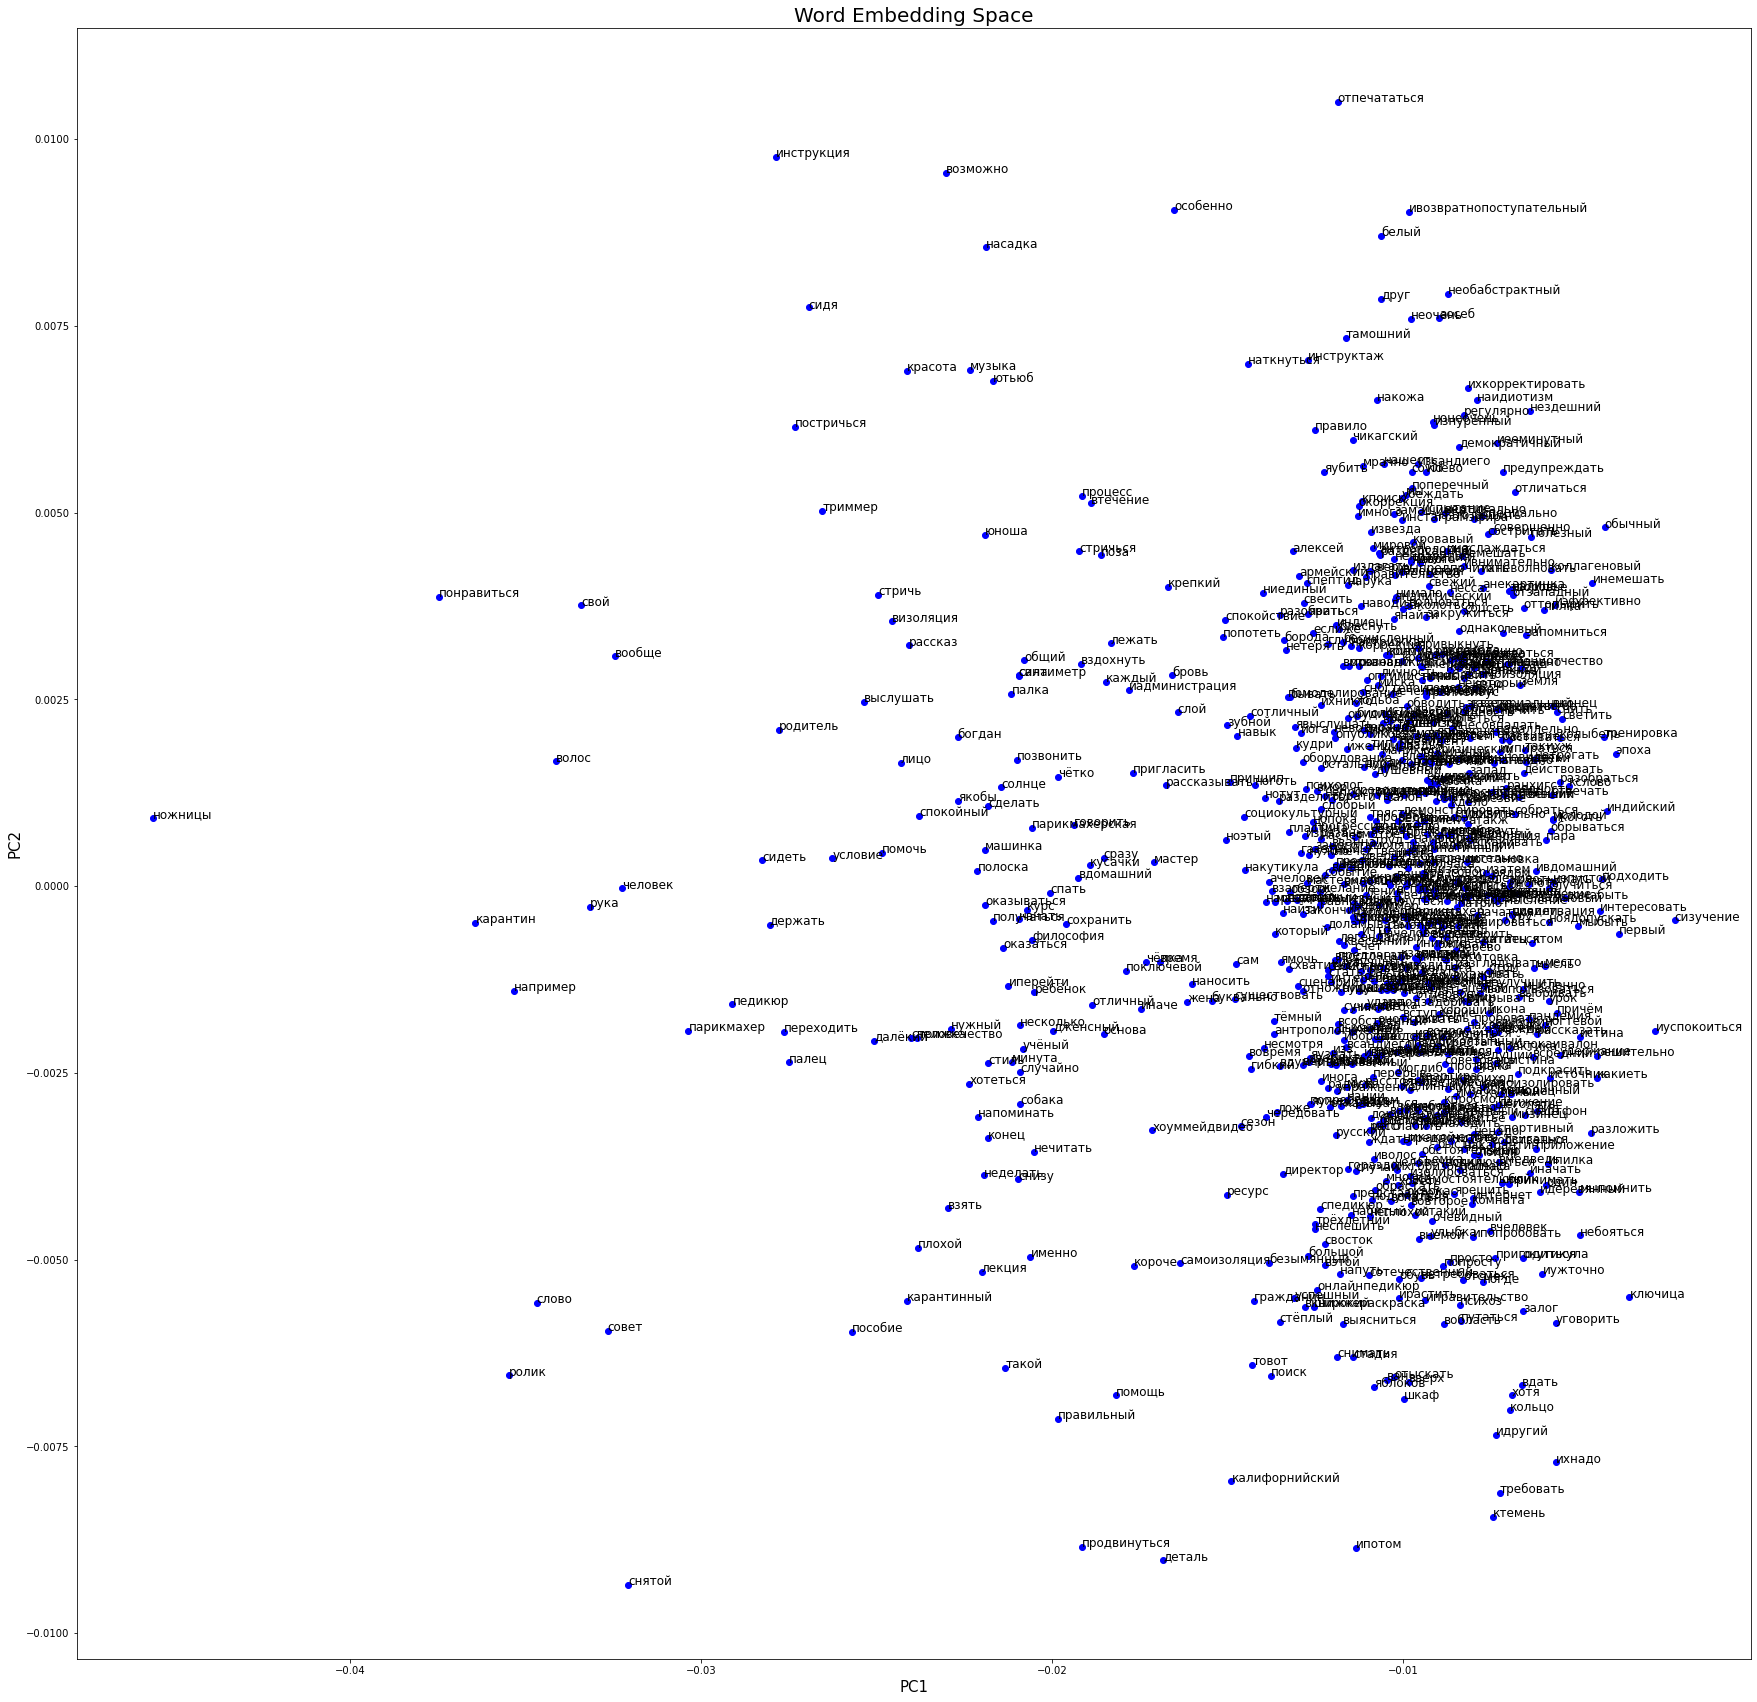

In [44]:
###Vizualization###

plt.figure(figsize=(30,30))
plt.scatter(embeddings_2d[:,0],embeddings_2d[:,1],linewidths=1,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(w2v_model.wv.index_to_key)
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(embeddings_2d[i,0],embeddings_2d[i,1]), fontsize = 12)

In [45]:
words_vectors_2d = []

for x in normalized_tokens:
    words_vectors_2d.append([df_embeddings_2d.loc[x][0],df_embeddings_2d.loc[x][1]])

words_vectors_2d = np.array(words_vectors_2d)
print(words_vectors_2d)

[[-3.95408165e-03  1.76676580e-03]
 [-1.63488878e-02 -5.04563850e-03]
 [-7.90810319e-03 -3.91681265e-04]
 ...
 [-2.82550194e-02  3.55332845e-04]
 [-5.39157884e-03 -1.59180669e-04]
 [-3.22448673e-02 -3.06535806e-05]]


In [46]:
H = len(words_vectors_2d)
print(H)
print(H//2)

1005
502


In [47]:
#attractors with respect to l = 1,2,...,H/2
def make_attractor(l, vectors):
    attractor = []
    for s in range(0,len(vectors)-l):
        attractor.append(vectors[s:s+l])
    return attractor

In [48]:
#corr integral func
def corr_integral(attractor, H, l, eps):
    sum = 0
    for n in range(0, len(attractor)-1):
        for m in range(n+1, len(attractor)):
            sum += np.heaviside(eps-np.linalg.norm(attractor[n] - attractor[m]),1)
    print("sum= "+str(sum))
    #print((1.0/((H-l)**2))*sum)
    return (1.0/((H-l)**2))*sum

In [49]:
#example of attractor
l_test = 5
a_l = make_attractor(l_test, words_vectors_2d)
for z in a_l:
    print(z)
print(len(a_l))
print(H-l_test)
print(len(a_l[0]))

[[-3.95408165e-03  1.76676580e-03]
 [-1.63488878e-02 -5.04563850e-03]
 [-7.90810319e-03 -3.91681265e-04]
 [-1.38345820e-02  5.69222393e-05]
 [-9.36270051e-03 -3.21083732e-03]]
[[-1.63488878e-02 -5.04563850e-03]
 [-7.90810319e-03 -3.91681265e-04]
 [-1.38345820e-02  5.69222393e-05]
 [-9.36270051e-03 -3.21083732e-03]
 [-5.96615516e-03 -1.06805471e-03]]
[[-7.90810319e-03 -3.91681265e-04]
 [-1.38345820e-02  5.69222393e-05]
 [-9.36270051e-03 -3.21083732e-03]
 [-5.96615516e-03 -1.06805471e-03]
 [-1.08090681e-02 -4.06461364e-03]]
[[-1.38345820e-02  5.69222393e-05]
 [-9.36270051e-03 -3.21083732e-03]
 [-5.96615516e-03 -1.06805471e-03]
 [-1.08090681e-02 -4.06461364e-03]
 [-3.41401387e-02  1.67111902e-03]]
[[-9.36270051e-03 -3.21083732e-03]
 [-5.96615516e-03 -1.06805471e-03]
 [-1.08090681e-02 -4.06461364e-03]
 [-3.41401387e-02  1.67111902e-03]
 [-7.00853076e-03 -1.13578541e-05]]
[[-5.96615516e-03 -1.06805471e-03]
 [-1.08090681e-02 -4.06461364e-03]
 [-3.41401387e-02  1.67111902e-03]
 [-7.00853076e-

 [-0.02212887  0.00020695]]
[[-0.00761368 -0.00011704]
 [-0.03315187 -0.00028097]
 [-0.01982911 -0.00713456]
 [-0.02212887  0.00020695]
 [-0.00849938  0.00053479]]
[[-0.03315187 -0.00028097]
 [-0.01982911 -0.00713456]
 [-0.02212887  0.00020695]
 [-0.00849938  0.00053479]
 [-0.01286863 -0.0014079 ]]
[[-0.01982911 -0.00713456]
 [-0.02212887  0.00020695]
 [-0.00849938  0.00053479]
 [-0.01286863 -0.0014079 ]
 [-0.01885772 -0.00158413]]
[[-2.21288682e-02  2.06951792e-04]
 [-8.49937972e-03  5.34794001e-04]
 [-1.28686313e-02 -1.40789850e-03]
 [-1.88577216e-02 -1.58413489e-03]
 [-8.48218196e-03  4.33805728e-05]]
[[-8.49937972e-03  5.34794001e-04]
 [-1.28686313e-02 -1.40789850e-03]
 [-1.88577216e-02 -1.58413489e-03]
 [-8.48218196e-03  4.33805728e-05]
 [-1.07856362e-02  8.76184054e-04]]
[[-1.28686313e-02 -1.40789850e-03]
 [-1.88577216e-02 -1.58413489e-03]
 [-8.48218196e-03  4.33805728e-05]
 [-1.07856362e-02  8.76184054e-04]
 [-1.69268044e-02 -1.01898888e-03]]
[[-1.88577216e-02 -1.58413489e-03]
 

 [-0.02288231 -0.0019102 ]]
[[-0.03207011 -0.0093509 ]
 [-0.0097862   0.00759407]
 [-0.01395214  0.00117891]
 [-0.02288231 -0.0019102 ]
 [-0.00747947  0.0012598 ]]
[[-0.0097862   0.00759407]
 [-0.01395214  0.00117891]
 [-0.02288231 -0.0019102 ]
 [-0.00747947  0.0012598 ]
 [-0.00774675  0.0039895 ]]
[[-0.01395214  0.00117891]
 [-0.02288231 -0.0019102 ]
 [-0.00747947  0.0012598 ]
 [-0.00774675  0.0039895 ]
 [-0.03532777 -0.00140602]]
[[-0.02288231 -0.0019102 ]
 [-0.00747947  0.0012598 ]
 [-0.00774675  0.0039895 ]
 [-0.03532777 -0.00140602]
 [-0.01670807  0.00400517]]
[[-0.00747947  0.0012598 ]
 [-0.00774675  0.0039895 ]
 [-0.03532777 -0.00140602]
 [-0.01670807  0.00400517]
 [-0.00421219  0.00100186]]
[[-0.00774675  0.0039895 ]
 [-0.03532777 -0.00140602]
 [-0.01670807  0.00400517]
 [-0.00421219  0.00100186]
 [-0.01714988 -0.00326859]]
[[-0.03532777 -0.00140602]
 [-0.01670807  0.00400517]
 [-0.00421219  0.00100186]
 [-0.01714988 -0.00326859]
 [-0.02910688 -0.00158322]]
[[-0.01670807  0.004

In [50]:
def make_eps(attr):
    min_norm = max_norm = np.linalg.norm(attr[0] - attr[1])
    #print(max_norm)
    for n in range(0, len(attr)-1):
        for m in range(n+1, len(attr)):
            temp = np.linalg.norm(attr[n] - attr[m])
            if(temp > max_norm):
                max_norm = temp
            elif(temp < min_norm) and (temp != 0):
                min_norm = temp
    return np.linspace(1.2*min_norm, 0.9*max_norm, 15)


l = 1
[5.83110666e-06 2.79227301e-03 5.57871492e-03 8.36515683e-03
 1.11515987e-02 1.39380406e-02 1.67244825e-02 1.95109245e-02
 2.22973664e-02 2.50838083e-02 2.78702502e-02 3.06566921e-02
 3.34431340e-02 3.62295759e-02 3.90160178e-02]
sum= 284.0
sum= 61779.0
sum= 178445.0
sum= 268864.0
sum= 332116.0
sum= 384189.0
sum= 421455.0
sum= 445850.0
sum= 462016.0
sum= 477867.0
sum= 490447.0
sum= 496167.0
sum= 497888.0
sum= 500608.0
sum= 502795.0


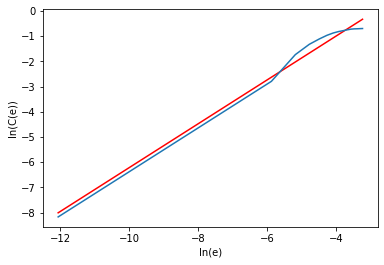

D_2 = 0.8723582960985935
l = 2
[0.00035438 0.00395723 0.00756008 0.01116293 0.01476578 0.01836863
 0.02197148 0.02557433 0.02917718 0.03278003 0.03638288 0.03998573
 0.04358858 0.04719143 0.05079428]
sum= 9.0
sum= 14564.0
sum= 90409.0
sum= 184019.0
sum= 275120.0
sum= 348510.0
sum= 397866.0
sum= 436992.0
sum= 469350.0
sum= 484331.0
sum= 492278.0
sum= 499045.0
sum= 501731.0
sum= 502364.0
sum= 502477.0


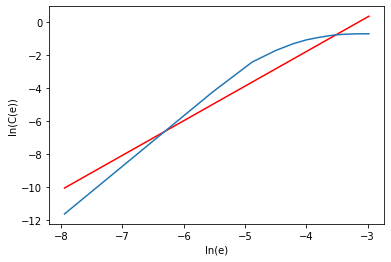

D_2 = 2.098883542661555
l = 3
[0.00108677 0.00494205 0.00879732 0.01265259 0.01650787 0.02036314
 0.02421842 0.02807369 0.03192896 0.03578424 0.03963951 0.04349478
 0.04735006 0.05120533 0.05506061]
sum= 2.0
sum= 4582.0
sum= 46172.0
sum= 121731.0
sum= 212558.0
sum= 295306.0
sum= 359685.0
sum= 416017.0
sum= 456539.0
sum= 476354.0
sum= 490473.0
sum= 498376.0
sum= 500741.0
sum= 501336.0
sum= 501469.0


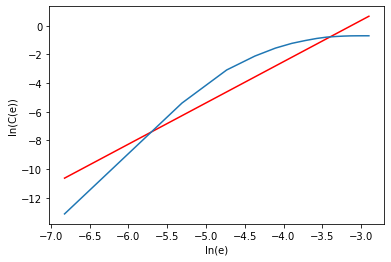

D_2 = 2.8786059054156103
l = 4
[0.00212946 0.00617636 0.01022326 0.01427016 0.01831705 0.02236395
 0.02641085 0.03045774 0.03450464 0.03855154 0.04259844 0.04664533
 0.05069223 0.05473913 0.05878603]
sum= 4.0
sum= 2321.0
sum= 29043.0
sum= 89060.0
sum= 172366.0
sum= 256209.0
sum= 330802.0
sum= 399511.0
sum= 445443.0
sum= 471875.0
sum= 489628.0
sum= 497360.0
sum= 499730.0
sum= 500318.0
sum= 500465.0


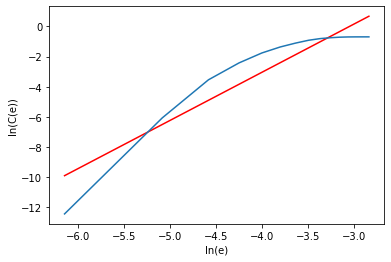

D_2 = 3.185167589144082
l = 5
[0.00280795 0.00684664 0.01088533 0.01492402 0.01896271 0.0230014
 0.02704009 0.03107878 0.03511747 0.03915616 0.04319485 0.04723354
 0.05127224 0.05531093 0.05934962]
sum= 3.0
sum= 773.0
sum= 14226.0
sum= 55060.0
sum= 123032.0
sum= 201190.0
sum= 279564.0
sum= 357880.0
sum= 418404.0
sum= 455285.0
sum= 480716.0
sum= 493399.0
sum= 497792.0
sum= 499077.0
sum= 499410.0


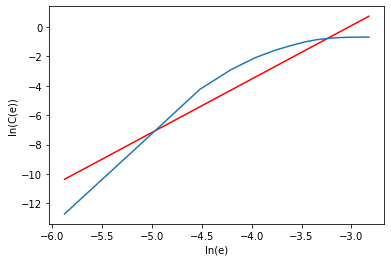

D_2 = 3.6342204527091146
l = 6
[0.00336186 0.00772956 0.01209726 0.01646495 0.02083265 0.02520035
 0.02956805 0.03393575 0.03830345 0.04267114 0.04703884 0.05140654
 0.05577424 0.06014194 0.06450963]
sum= 1.0
sum= 351.0
sum= 9420.0
sum= 43983.0
sum= 107982.0
sum= 186528.0
sum= 272740.0
sum= 359332.0
sum= 420300.0
sum= 460967.0
sum= 484995.0
sum= 494312.0
sum= 497395.0
sum= 498264.0
sum= 498463.0


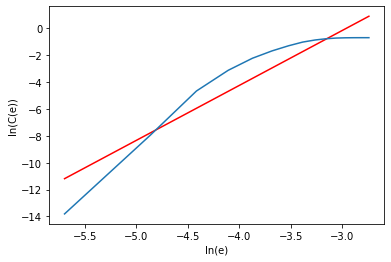

D_2 = 4.092776026711864
l = 7
[0.00526617 0.00972247 0.01417878 0.01863508 0.02309138 0.02754769
 0.03200399 0.03646029 0.0409166  0.0453729  0.0498292  0.05428551
 0.05874181 0.06319811 0.06765442]
sum= 2.0
sum= 596.0
sum= 10599.0
sum= 43693.0
sum= 103637.0
sum= 180126.0
sum= 271211.0
sum= 357665.0
sum= 419315.0
sum= 462161.0
sum= 484725.0
sum= 493640.0
sum= 496474.0
sum= 497272.0
sum= 497475.0


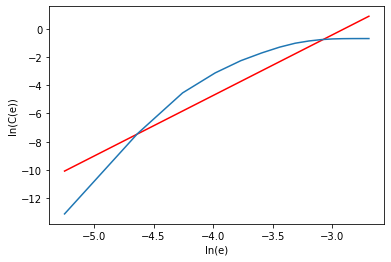

D_2 = 4.296815185618029
l = 8
[0.00628908 0.01072618 0.01516328 0.01960038 0.02403748 0.02847458
 0.03291168 0.03734878 0.04178588 0.04622297 0.05066007 0.05509717
 0.05953427 0.06397137 0.06840847]
sum= 5.0
sum= 436.0
sum= 7785.0
sum= 33506.0
sum= 84377.0
sum= 153876.0
sum= 242135.0
sum= 331356.0
sum= 399051.0
sum= 448418.0
sum= 477229.0
sum= 490064.0
sum= 494677.0
sum= 496036.0
sum= 496436.0


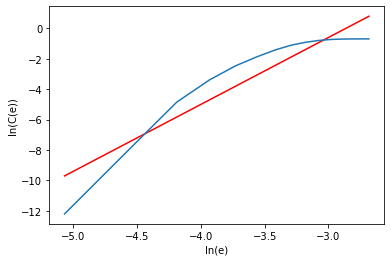

D_2 = 4.397551247259401
l = 9
[0.0073151  0.01177388 0.01623265 0.02069143 0.02515021 0.02960898
 0.03406776 0.03852654 0.04298532 0.04744409 0.05190287 0.05636165
 0.06082042 0.0652792  0.06973798]
sum= 6.0
sum= 332.0
sum= 6076.0
sum= 27484.0
sum= 72056.0
sum= 136554.0
sum= 222350.0
sum= 311612.0
sum= 383358.0
sum= 437670.0
sum= 470971.0
sum= 486870.0
sum= 492922.0
sum= 494834.0
sum= 495376.0


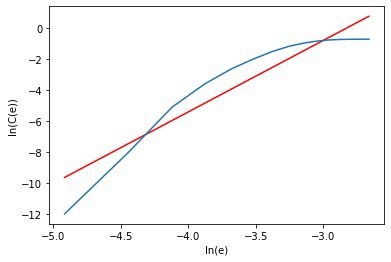

D_2 = 4.632906530862513
l = 10
[0.00829597 0.01286153 0.01742709 0.02199265 0.02655822 0.03112378
 0.03568934 0.0402549  0.04482046 0.04938603 0.05395159 0.05851715
 0.06308271 0.06764827 0.07221383]
sum= 3.0
sum= 311.0
sum= 5026.0
sum= 24330.0
sum= 65721.0
sum= 128937.0
sum= 214615.0
sum= 303960.0
sum= 378199.0
sum= 434582.0
sum= 469305.0
sum= 485843.0
sum= 491893.0
sum= 493874.0
sum= 494395.0


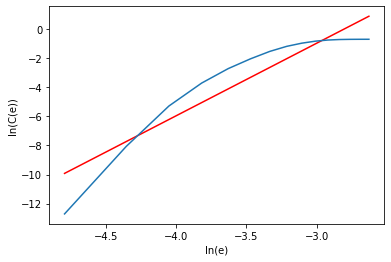

D_2 = 4.995648787619428


In [51]:
D_2_vals = []
ln_r_vals = []
ln_C_vals = []
for i in range(1,11):
    print('l = '+ str(i))
    attr = make_attractor(i, words_vectors_2d)
    eps = make_eps(attr)
    print(eps)
    x = np.array([ln(r) for r in eps])
    y = np.array([ln(corr_integral(attr, len(words_vectors_2d), i, r)) for r in eps])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[:15].astype(float),y[:15].astype(float))
    ln_r_vals.append(x)
    ln_C_vals.append(y)
    plt.xlabel("ln(e)")
    plt.ylabel("ln(C(e))")
    plt.plot(x, slope*x + intercept, 'r')
    plt.plot(x,y)
    plt.show()
    D = slope
    D_2_vals.append(D)
    print("D_2 = " + str(D))

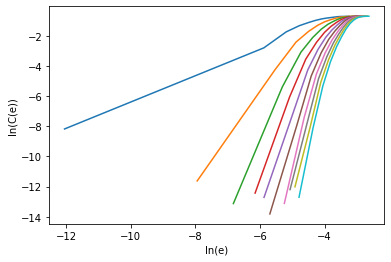

In [52]:
for i in range(0,10):
    plt.plot(ln_r_vals[i],ln_C_vals[i])
#plt.title("Графики зависимости ln C(eps) от ln eps при разных l=1..10 для аттрактора")
plt.xlabel("ln(e)")
plt.ylabel("ln(C(e))")
plt.show()

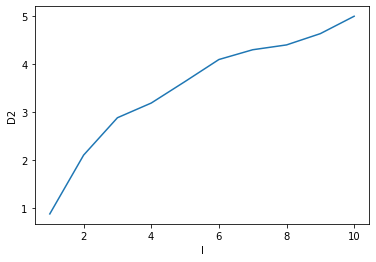

In [53]:
l_vals = range(1,11)
#plt.title("График зависимости Корреляционной размерности D2(l)")
plt.xlabel("l")
plt.ylabel("D2")
plt.plot(l_vals,D_2_vals)
plt.show()